## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read the data

In [46]:
data = pd.read_csv('Dataset/train.csv')
data.drop(['pet_id'], axis=1, inplace=True)
data.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [47]:
test_data = pd.read_csv('Dataset/test.csv')
test_data.drop(['pet_id'], axis=1, inplace=True)
test_data.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


## Data Preprocessing

### Difference of dates

In [48]:
from datetime import date

def difference(cols):
    x = cols[0].split(' ')
    fx = x[0].split('-')
    y = cols[1].split(' ')
    fy = y[0].split('-')
    f_date = date(int(fx[0]), int(fx[1]), int(fx[2]))
    l_date = date(int(fy[0]), int(fy[1]), int(fy[2]))
    return str(l_date - f_date).split(' ')[0]
    
data['days'] = data[['issue_date', 'listing_date']].apply(difference, axis=1)
data.drop(['issue_date', 'listing_date'], axis=1, inplace=True)

In [49]:
data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73
1,1.0,White,0.72,14.19,13,9,0.0,2,1862
2,NaN,Brown,0.15,40.90,15,4,2.0,4,752
3,1.0,White,0.62,17.82,0,1,0.0,2,755
4,2.0,Black,0.50,11.06,18,4,0.0,1,52


### Reduce the number of categories

In [50]:
data.color_type.value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [51]:
color_type = dict(data.color_type.value_counts())
rare = []
average = []
for key in color_type:
    if color_type[key] <= 200:
        rare.append(key)
    elif color_type[key] > 200 and color_type[key] <= 350: #200, 350
        average.append(key)

print(rare)
print(average)

['Cream Tabby', 'Sable', 'Cream', 'Fawn', 'Yellow', 'Buff', 'Lynx Point', 'Blue Merle', 'Seal Point', 'Black Brindle', 'Gray Tabby', 'Black Tabby', 'Flame Point', 'Brown Merle', 'Orange', 'Black Smoke', 'Gold', 'Tortie Point', 'Silver', 'Red Tick', 'Blue Tick', 'Blue Point', 'Lilac Point', 'Silver Tabby', 'Yellow Brindle', 'Red Merle', 'Apricot', 'Calico Point', 'Blue Tiger', 'Blue Cream', 'Chocolate Point', 'Pink', 'Green', 'Blue Smoke', 'Brown Tiger', 'Agouti', 'Silver Lynx Point', 'Liver', 'Liver Tick', 'Black Tiger']
['Calico', 'Gray', 'Chocolate', 'Torbie']


In [52]:
def replace_category(cols):
    category = cols[0]
    if category in rare:
        return 'Rare'
    elif category in average:
        return 'Average'
    else:
        return category
    
data['color_type'] = data[['color_type']].apply(replace_category, axis=1)
data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73
1,1.0,White,0.72,14.19,13,9,0.0,2,1862
2,NaN,Brown,0.15,40.90,15,4,2.0,4,752
3,1.0,White,0.62,17.82,0,1,0.0,2,755
4,2.0,Black,0.50,11.06,18,4,0.0,1,52


Text(0.5, 1.0, 'Color Type Counts')

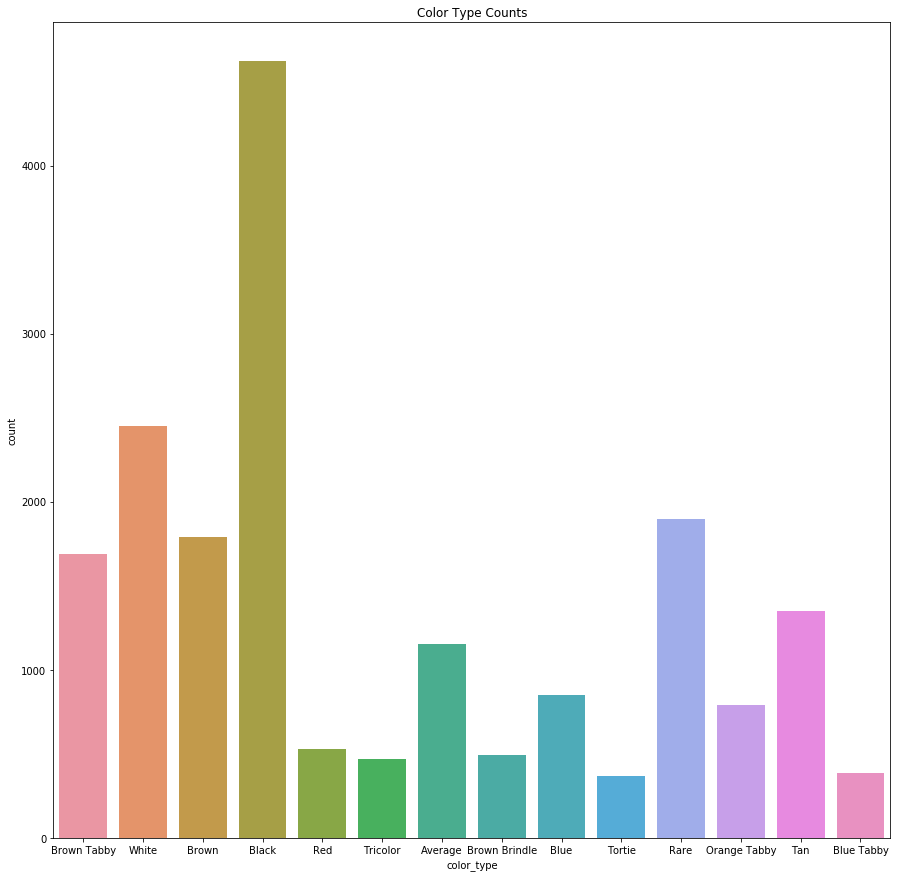

In [53]:
plt.figure(figsize=(15, 15))
sns.countplot(data.color_type)
plt.title('Color Type Counts')

### Encode Categorical Feature
1. Label Encoding (used for nominal categories)
2. One Hot Encoding (used for ordinal categories)
3. Target Encoding (problem of overfitting)

In [54]:
label_encoder = LabelEncoder()
data['color_type'] = label_encoder.fit_transform(data['color_type'])

In [55]:
test_data['days'] = test_data[['issue_date', 'listing_date']].apply(difference, axis=1)
test_data.drop(['issue_date', 'listing_date'], axis=1, inplace=True)

In [56]:
test_data['color_type'] = test_data[['color_type']].apply(replace_category, axis=1)
test_data.head()

,condition,color_type,length(m),height(cm),X1,X2,days
0,0.0,Black,0.87,42.73,0,7,4404
1,1.0,Orange Tabby,0.06,6.71,0,1,174
2,1.0,Black,0.24,41.21,0,7,1999
3,1.0,Black,0.29,8.46,7,1,1148
4,1.0,Brown,0.71,30.92,0,7,463


In [57]:
test_data['color_type'] = label_encoder.fit_transform(test_data['color_type'])

### Handle Missing Values
1. Drop null values
2. Impute them with mean, median, or mode.
3. Train a model to predict null values.
4. Get some relationship of the feature with null value with that of the target value.

Tried out both 3 and 4 but 4 worked out to be the best.

In [58]:
data.isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
days                 0
dtype: int64

In [59]:
test_data.isnull().sum()

condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
days            0
dtype: int64

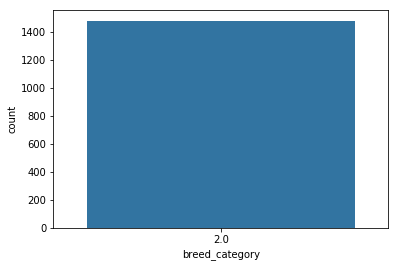

In [65]:
bool_data = data.isnull()

sns.countplot(data[bool_data['condition'] == True].breed_category)

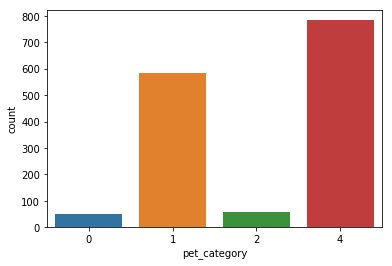

In [66]:
sns.countplot(data[bool_data['condition'] == True].pet_category)

All the null values have the breed_category as 2. Hence treating them as a seperate category in condition feature makes sense. That is if its of breed_category 2 then its condition is unknown let it be another category 3.

In [67]:
data.fillna(3, inplace=True)
test_data.fillna(3, inplace=True)

In [68]:
data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,2.0,6,0.80,7.78,13,9,0.0,1,73
1,1.0,13,0.72,14.19,13,9,0.0,2,1862
2,3.0,4,0.15,40.90,15,4,2.0,4,752
3,1.0,13,0.62,17.82,0,1,0.0,2,755
4,2.0,1,0.50,11.06,18,4,0.0,1,52


In [69]:
def change_value(cols):
    value = cols[0]
    if value == 4:
        return value - 1
    else:
        return value
    
data['pet_category'] = data[['pet_category']].apply(change_value, axis=1)

In [70]:
data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,2.0,6,0.80,7.78,13,9,0.0,1,73
1,1.0,13,0.72,14.19,13,9,0.0,2,1862
2,3.0,4,0.15,40.90,15,4,2.0,3,752
3,1.0,13,0.62,17.82,0,1,0.0,2,755
4,2.0,1,0.50,11.06,18,4,0.0,1,52


## Feature Importance
1. correlation matrix
2. ppscore
3. extra tree classifier or regressor

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated clas

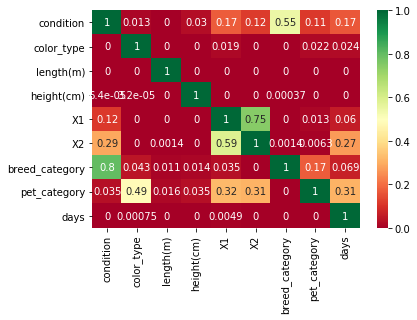

In [71]:
import ppscore #how is it calculated?
sns.heatmap(ppscore.matrix(data), cmap='RdYlGn', annot=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.70681645 0.03828588 0.05658776 0.05959965 0.02147341 0.01757137
 0.03769072 0.06197476]


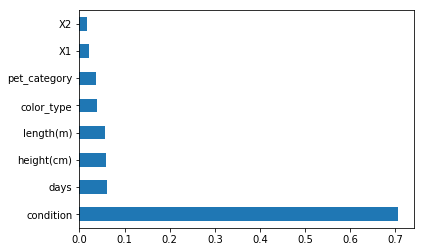

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

model_fi = ExtraTreesClassifier()
labels = pd.DataFrame(data.breed_category, columns=['breed_category'])
fi_train = data.drop('breed_category', axis=1)
model_fi.fit(fi_train, labels)

print(model_fi.feature_importances_)

feat_importances = pd.Series(model_fi.feature_importances_, index=fi_train.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.05019618 0.2512765  0.1211506  0.13057999 0.11879418 0.07177463
 0.04421451 0.21201341]


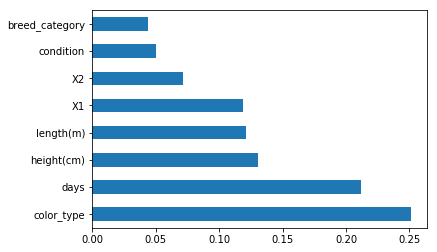

In [73]:
model_fi2 = ExtraTreesClassifier()
labels2 = pd.DataFrame(data.pet_category, columns=['pet_category'])
fi_train2 = data.drop('pet_category', axis=1)
model_fi2.fit(fi_train2, labels2)

print(model_fi2.feature_importances_)

feat_importances = pd.Series(model_fi2.feature_importances_, index=fi_train2.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

## Remove Outliers

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64


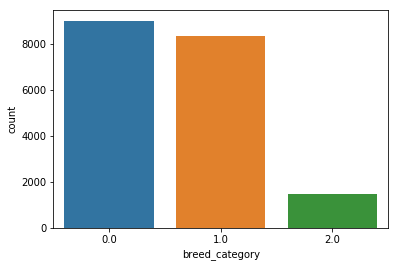

In [74]:
print(data.breed_category.value_counts())
sns.countplot(data.breed_category)

2    10621
1     7184
3      941
0       88
Name: pet_category, dtype: int64


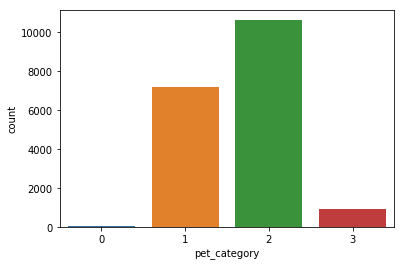

In [75]:
print(data.pet_category.value_counts())
sns.countplot(data.pet_category)

In [76]:
data_breed = data.drop('pet_category', axis=1)
data_breed.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,days
0,2.0,6,0.80,7.78,13,9,0.0,73
1,1.0,13,0.72,14.19,13,9,0.0,1862
2,3.0,4,0.15,40.90,15,4,2.0,752
3,1.0,13,0.62,17.82,0,1,0.0,755
4,2.0,1,0.50,11.06,18,4,0.0,52


In [77]:
data_pet = data.drop('breed_category', axis=1)
data_pet.head()

,condition,color_type,length(m),height(cm),X1,X2,pet_category,days
0,2.0,6,0.80,7.78,13,9,1,73
1,1.0,13,0.72,14.19,13,9,2,1862
2,3.0,4,0.15,40.90,15,4,3,752
3,1.0,13,0.62,17.82,0,1,2,755
4,2.0,1,0.50,11.06,18,4,1,52


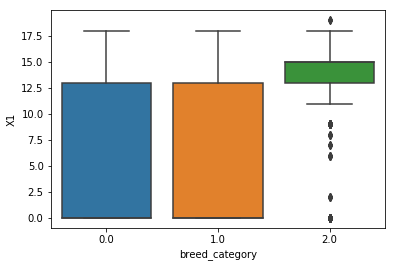

In [78]:
sns.boxplot(data.breed_category, data.X1)

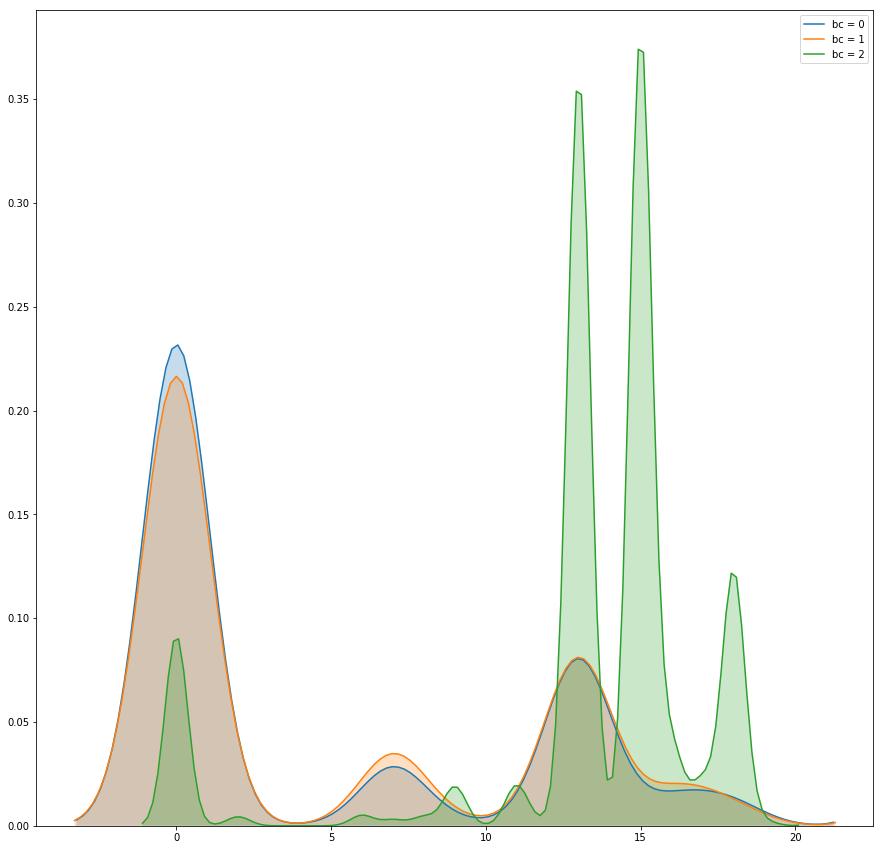

In [79]:
plt.figure(figsize=(15, 15))
sns.kdeplot(data_breed[data_breed['breed_category'] == 0].X1, shade=True, label='bc = 0')
sns.kdeplot(data_breed[data_breed['breed_category'] == 1].X1, shade=True, label='bc = 1')
sns.kdeplot(data_breed[data_breed['breed_category'] == 2].X1, shade=True, label='bc = 2')

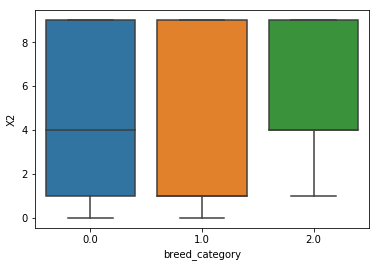

In [80]:
sns.boxplot(data_breed.breed_category, data_breed.X2)

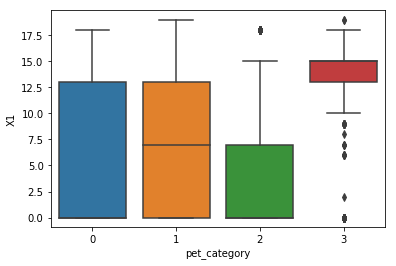

In [81]:
sns.boxplot(data_pet.pet_category, data_breed.X1)

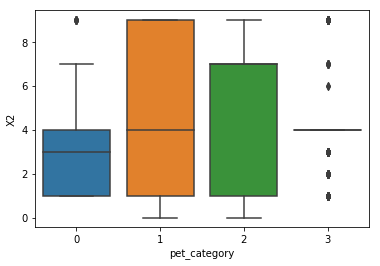

In [82]:
sns.boxplot(data_pet.pet_category, data_breed.X2)

In [83]:
index = list(data_pet[(data_pet['X1'] > 13) & (data_pet['pet_category'] == 2)].index)
data_pet.drop(index, axis=0, inplace=True)
print(len(index))
data_pet.shape

144


(18690, 8)

In [84]:
labels_breed = pd.DataFrame(data_breed.breed_category, columns=['breed_category'])
labels_pet = pd.DataFrame(data_pet.pet_category, columns=['pet_category'])
data_breed.drop('breed_category', axis=1, inplace=True)
data_pet.drop('pet_category', axis=1, inplace=True)

## Model Selection

In [88]:
def convert_to_float(cols):
    return float(cols[0])

data_breed['condition'] = data_breed[['condition']].apply(convert_to_float, axis=1)
data_breed['color_type'] = data_breed[['color_type']].apply(convert_to_float, axis=1)
data_breed['length(m)'] = data_breed[['length(m)']].apply(convert_to_float, axis=1)
data_breed['height(cm)'] = data_breed[['height(cm)']].apply(convert_to_float, axis=1)
data_breed['X1'] = data_breed[['X1']].apply(convert_to_float, axis=1)
data_breed['X2'] = data_breed[['X2']].apply(convert_to_float, axis=1)
data_breed['days'] = data_breed[['days']].apply(convert_to_float, axis=1)

data_pet['condition'] = data_pet[['condition']].apply(convert_to_float, axis=1)
data_pet['color_type'] = data_pet[['color_type']].apply(convert_to_float, axis=1)
data_pet['length(m)'] = data_pet[['length(m)']].apply(convert_to_float, axis=1)
data_pet['height(cm)'] = data_pet[['height(cm)']].apply(convert_to_float, axis=1)
data_pet['X1'] = data_pet[['X1']].apply(convert_to_float, axis=1)
data_pet['X2'] = data_pet[['X2']].apply(convert_to_float, axis=1)
data_pet['days'] = data_pet[['days']].apply(convert_to_float, axis=1)

test_data['condition'] = test_data[['condition']].apply(convert_to_float, axis=1)
test_data['color_type'] = test_data[['color_type']].apply(convert_to_float, axis=1)
test_data['length(m)'] = test_data[['length(m)']].apply(convert_to_float, axis=1)
test_data['height(cm)'] = test_data[['height(cm)']].apply(convert_to_float, axis=1)
test_data['X1'] = test_data[['X1']].apply(convert_to_float, axis=1)
test_data['X2'] = test_data[['X2']].apply(convert_to_float, axis=1)
test_data['days'] = test_data[['days']].apply(convert_to_float, axis=1)

LGBMClassifier(boosting='goss', learning_rate=0.04, max_bin=50, max_depth=7,
               min_data_in_leaf=15, n_estimators=275, num_leaves=40)


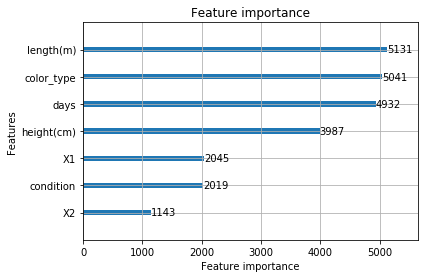

LGBMClassifier(boosting='dart', learning_rate=0.05, max_bin=185, max_depth=8,
               n_estimators=500, reg_lambda=0.5)


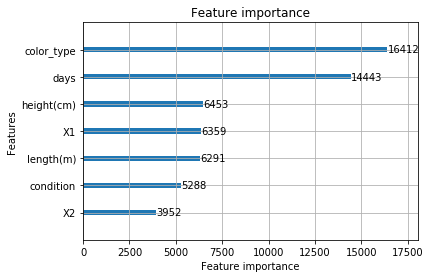

In [89]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

model_breed = LGBMClassifier(
    n_estimators=275, 
    learning_rate=0.04, 
    max_depth=7, 
    num_leaves=40,
    max_bin=50,
    min_data_in_leaf=15,
    boosting='goss',
)
model_breed.fit(data_breed, labels_breed.breed_category.ravel())
print(model_breed)
lgb.plot_importance(model_breed)
plt.show()

model_pet = LGBMClassifier(
    n_estimators=500, 
    learning_rate=0.05, 
    reg_lambda=0.5, 
    max_depth=8,
    max_bin=185,
    boosting='dart',
)
model_pet.fit(data_pet, labels_pet.pet_category.ravel())
print(model_pet)
lgb.plot_importance(model_pet)
plt.show()

predict_breed = pd.DataFrame(model_breed.predict(test_data), columns=['breed_category'])
predict_pet = pd.DataFrame(model_pet.predict(test_data), columns=['pet_category'])

In [77]:
# from catboost import CatBoostClassifier

# def convert_to_string(cols):
#     return str(cols[0])

# data_breed['condition'] = data_breed[['condition']].apply(convert_to_string, axis=1)
# data_breed['color_type'] = data_breed[['color_type']].apply(convert_to_string, axis=1)
# data_breed['length(m)'] = data_breed[['length(m)']].apply(convert_to_string, axis=1)
# data_breed['height(cm)'] = data_breed[['height(cm)']].apply(convert_to_string, axis=1)
# data_breed['X1'] = data_breed[['X1']].apply(convert_to_string, axis=1)
# data_breed['X2'] = data_breed[['X2']].apply(convert_to_string, axis=1)

# data_pet['condition'] = data_pet[['condition']].apply(convert_to_string, axis=1)
# data_pet['color_type'] = data_pet[['color_type']].apply(convert_to_string, axis=1)
# data_pet['length(m)'] = data_pet[['length(m)']].apply(convert_to_string, axis=1)
# data_pet['height(cm)'] = data_pet[['height(cm)']].apply(convert_to_string, axis=1)
# data_pet['X1'] = data_pet[['X1']].apply(convert_to_string, axis=1)
# data_pet['X2'] = data_pet[['X2']].apply(convert_to_string, axis=1)

# test_data['condition'] = test_data[['condition']].apply(convert_to_string, axis=1)
# test_data['color_type'] = test_data[['color_type']].apply(convert_to_string, axis=1)
# test_data['length(m)'] = test_data[['length(m)']].apply(convert_to_string, axis=1)
# test_data['height(cm)'] = test_data[['height(cm)']].apply(convert_to_string, axis=1)
# test_data['X1'] = test_data[['X1']].apply(convert_to_string, axis=1)
# test_data['X2'] = test_data[['X2']].apply(convert_to_string, axis=1)

# model_breed = CatBoostClassifier(iterations=1250, depth=8, learning_rate=0.05)
# cat_features = [0, 1, 4, 5]
# model_breed.fit(data_breed, labels_breed, cat_features=cat_features, verbose=10)

# model_pet = CatBoostClassifier(iterations=1500, depth=10, learning_rate=0.01)
# cat_features = [0, 1, 4, 5]
# model_pet.fit(data_pet, labels_pet, cat_features=cat_features, verbose=10)

# predict_breed = pd.DataFrame(model_breed.predict(test_data), columns=['breed_category'])
# predict_pet = pd.DataFrame(model_pet.predict(test_data), columns=['pet_category'])

In [85]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# params = {
#     'criterion' : ['gini'],
#     'bootstrap' : [True],
#     'n_estimators' : [150, 175, 200, 225],
#     'max_features' : [3, 4, 5]
# }

# #x = data_breed_sam.drop('X2', axis=1)
# model_breed = RandomForestClassifier()
# rscv_breed = RandomizedSearchCV(model_breed, params, random_state=0, n_iter=5)
# search_breed = rscv_breed.fit(data_breed, labels_breed)
# print(search_breed.best_params_)

# #y = data_pet_sam.drop('condition', axis=1)
# model_pet = RandomForestClassifier()
# rscv_pet = RandomizedSearchCV(model_pet, params, random_state=0, n_iter=5)
# search_pet = rscv_pet.fit(data_pet, labels_pet)
# print(search_pet.best_params_)

In [86]:
# import xgboost
# #n_estimators, max_depth, reg_alpha.
# #x = data_breed_sam.drop('color_type', axis=1)
# regressor = xgboost.XGBClassifier(
#                 n_estimators=1000,
#                 n_jobs=-1,
#                 gamma=0,
#                 eta=0.3,
#                 reg_lambda=1,
#                 reg_alpha=0.2,
#                 max_depth=10,
#                 seed=42
#             )
# regressor.fit(data_breed, labels_breed)
# predict_breed = regressor.predict(test_data)

# regressor = xgboost.XGBClassifier(
#                 n_estimators=1250,
#                 n_jobs=-1,
#                 gamma=0,
#                 eta=0.3,
#                 reg_lambda=1,
#                 reg_alpha=0,
#                 max_depth=12,
#                 seed=42
#             )
# regressor.fit(data_pet, labels_pet)
# predict_pet = regressor.predict(test_data)

# predict_breed = pd.DataFrame(predict_breed, columns=['breed_category'])
# predict_pet = pd.DataFrame(predict_pet, columns=['pet_category'])

## Post Processing

In [90]:
def replace(cols):
    value = cols[0]
    if value == 3:
        return value + 1
    else:
        return value
    
predict_pet['pet_category'] = predict_pet[['pet_category']].apply(replace, axis=1)

In [92]:
temp_data = pd.read_csv('Dataset/test.csv')
final_csv = pd.concat([temp_data.pet_id, predict_breed, predict_pet], axis=1)
final_csv.to_csv('predictions.csv', index=False)

# Neural Networks Basics

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras import regularizers

In [95]:
X_train_breed, X_val_breed, Y_train_breed, Y_val_breed = train_test_split(data_breed, labels_breed, test_size = 0.2, shuffle=True)

In [96]:
Y_train_breed = pd.get_dummies(Y_train_breed.breed_category)
Y_val_breed = pd.get_dummies(Y_val_breed.breed_category)

In [100]:
model_breed = Sequential([
    Dense(128, input_shape = (7,), activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-3)),
    Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-3)),
    Dense(32, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-3)),
    Dense(3, activation = 'softmax')
])

In [101]:
optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss = BinaryCrossentropy()
metrics = [Accuracy(), Precision(), Recall()]

model_breed.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [102]:
history = model_breed.fit(X_train_breed, Y_train_breed, validation_data=(X_val_breed, Y_val_breed), batch_size = 256, epochs = 70, shuffle = True)

Train on 15067 samples, validate on 3767 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/70
15067/15067 [==============================] - 3s 215us/sample - loss: 1.9710 - accuracy: 0.0594 - precision_1: 0.4326 - recall_1: 0.4147 - val_loss: 0.9656 - val_accuracy: 0.0529 - val_precision_1: 0.4653 - val_recall_1: 0.4462
Epoch 2/70
15067/15067 [==============================] - 1s 34us/sample - loss: 0.9851 - accuracy: 0.0527 - precision_1: 0.4714 - recall_1: 0.4408 - val_loss: 1.0129 - val_accuracy: 0.0510 - val_precision_1: 0.4499 - val_recall_1: 0.4125
Epoch 3/70
15067/15067 [==============================] - 0s 32us/sample - loss: 0.9166 - accuracy: 0.0442 - precision_1: 0.4814 - recall_1: 0.4410 - val_loss: 1.1053 - val_accuracy: 0.0404 - val_precision_1: 0.4955 - val_recall_1: 0.4489
Epoch 4/70
15067/15067 [==============================] - 0s 31us/sample - loss: 0.9133 - accuracy: 0.0353 - precision_1: 0.4979 - recall_1

Epoch 33/70
15067/15067 [==============================] - 1s 34us/sample - loss: 0.3352 - accuracy: 0.0000e+00 - precision_1: 0.8578 - recall_1: 0.8397 - val_loss: 0.3043 - val_accuracy: 0.0000e+00 - val_precision_1: 0.8869 - val_recall_1: 0.8720
Epoch 34/70
15067/15067 [==============================] - 1s 40us/sample - loss: 0.3125 - accuracy: 0.0000e+00 - precision_1: 0.8709 - recall_1: 0.8553 - val_loss: 0.2869 - val_accuracy: 0.0000e+00 - val_precision_1: 0.8872 - val_recall_1: 0.8707
Epoch 35/70
15067/15067 [==============================] - 0s 32us/sample - loss: 0.3043 - accuracy: 0.0000e+00 - precision_1: 0.8644 - recall_1: 0.8487 - val_loss: 0.2786 - val_accuracy: 0.0000e+00 - val_precision_1: 0.8894 - val_recall_1: 0.8643
Epoch 36/70
15067/15067 [==============================] - 0s 31us/sample - loss: 0.3046 - accuracy: 2.2123e-05 - precision_1: 0.8607 - recall_1: 0.8415 - val_loss: 0.3607 - val_accuracy: 0.0000e+00 - val_precision_1: 0.7946 - val_recall_1: 0.7661
Epoch 37

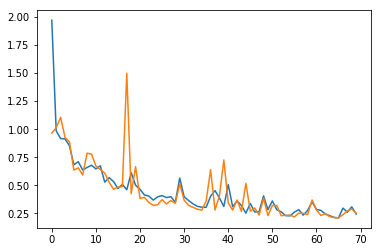

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [104]:
predict_breed = model_breed.predict(test_data)

In [105]:
predict_breed

array([[8.9217406e-03, 9.9107820e-01, 9.8820458e-25],
       [9.5108342e-01, 4.8538346e-02, 3.7817284e-04],
       [9.9360621e-01, 6.3937833e-03, 7.6675125e-13],
       ...,
       [1.4989298e-05, 9.9998498e-01, 3.4165616e-14],
       [2.8834458e-02, 3.0550571e-02, 9.4061494e-01],
       [1.2186033e-04, 9.9987817e-01, 2.2899024e-10]], dtype=float32)

In [106]:
pred_class_breed = []
for pred in predict_breed:
    lis = list(pred)
    pred_class_breed.append(lis.index(max(lis)))

In [107]:
pred_class_breed = pd.DataFrame(pred_class_breed, columns=['breed_category'])

In [108]:
pred_class_breed.breed_category.value_counts()

0    4766
1    2690
2     616
Name: breed_category, dtype: int64

In [110]:
X_train_pet, X_val_pet, Y_train_pet, Y_val_pet = train_test_split(data_pet, labels_pet, test_size = 0.15, shuffle=True)

In [111]:
Y_train_pet = pd.get_dummies(Y_train_pet.pet_category)
Y_val_pet = pd.get_dummies(Y_val_pet.pet_category)

In [114]:
model_pet = Sequential([
    Dense(128, input_shape = (7,), activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(32, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(4, activation = 'softmax')
])

In [115]:
optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss = BinaryCrossentropy()
metrics = [Accuracy(), Precision(), Recall()]

model_pet.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [116]:
history = model_pet.fit(X_train_pet, Y_train_pet, validation_data=(X_val_pet, Y_val_pet), batch_size = 256, epochs = 125, shuffle = True)

Train on 15886 samples, validate on 2804 samples
Epoch 1/125
15886/15886 [==============================] - 2s 143us/sample - loss: 1.2645 - accuracy: 0.0681 - precision_3: 0.5729 - recall_3: 0.5201 - val_loss: 0.5099 - val_accuracy: 0.0072 - val_precision_3: 0.5987 - val_recall_3: 0.5810
Epoch 2/125
15886/15886 [==============================] - 1s 37us/sample - loss: 0.5582 - accuracy: 0.0015 - precision_3: 0.6310 - recall_3: 0.5428 - val_loss: 0.4686 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7011 - val_recall_3: 0.6309
Epoch 3/125
15886/15886 [==============================] - 1s 40us/sample - loss: 0.5297 - accuracy: 0.0016 - precision_3: 0.6559 - recall_3: 0.5874 - val_loss: 0.4532 - val_accuracy: 0.0000e+00 - val_precision_3: 0.5617 - val_recall_3: 0.4283
Epoch 4/125
15886/15886 [==============================] - 1s 32us/sample - loss: 0.4982 - accuracy: 0.0016 - precision_3: 0.6798 - recall_3: 0.6046 - val_loss: 0.3869 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7284 -

Epoch 34/125
15886/15886 [==============================] - 0s 31us/sample - loss: 0.3325 - accuracy: 0.0000e+00 - precision_3: 0.7424 - recall_3: 0.7138 - val_loss: 0.3270 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7296 - val_recall_3: 0.6755
Epoch 35/125
15886/15886 [==============================] - 1s 33us/sample - loss: 0.3240 - accuracy: 0.0000e+00 - precision_3: 0.7472 - recall_3: 0.7192 - val_loss: 0.3234 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7585 - val_recall_3: 0.7279
Epoch 36/125
15886/15886 [==============================] - 1s 40us/sample - loss: 0.3302 - accuracy: 0.0000e+00 - precision_3: 0.7441 - recall_3: 0.7177 - val_loss: 0.3436 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7453 - val_recall_3: 0.7254
Epoch 37/125
15886/15886 [==============================] - 0s 28us/sample - loss: 0.3068 - accuracy: 0.0000e+00 - precision_3: 0.7576 - recall_3: 0.7333 - val_loss: 0.3097 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7488 - val_recall_3: 0.7347
Epoc

Epoch 67/125
15886/15886 [==============================] - 1s 33us/sample - loss: 0.3056 - accuracy: 0.0000e+00 - precision_3: 0.7597 - recall_3: 0.7357 - val_loss: 0.3558 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7643 - val_recall_3: 0.7504
Epoch 68/125
15886/15886 [==============================] - 1s 41us/sample - loss: 0.3064 - accuracy: 0.0000e+00 - precision_3: 0.7618 - recall_3: 0.7426 - val_loss: 0.3595 - val_accuracy: 0.0000e+00 - val_precision_3: 0.6793 - val_recall_3: 0.6737
Epoch 69/125
15886/15886 [==============================] - 1s 33us/sample - loss: 0.3050 - accuracy: 0.0000e+00 - precision_3: 0.7555 - recall_3: 0.7389 - val_loss: 0.2985 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7557 - val_recall_3: 0.7457
Epoch 70/125
15886/15886 [==============================] - 1s 34us/sample - loss: 0.3013 - accuracy: 0.0000e+00 - precision_3: 0.7615 - recall_3: 0.7446 - val_loss: 0.3470 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7646 - val_recall_3: 0.7539
Epoc

Epoch 100/125
15886/15886 [==============================] - 1s 41us/sample - loss: 0.2838 - accuracy: 0.0000e+00 - precision_3: 0.7739 - recall_3: 0.7597 - val_loss: 0.3044 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7501 - val_recall_3: 0.7193
Epoch 101/125
15886/15886 [==============================] - 1s 33us/sample - loss: 0.2858 - accuracy: 0.0000e+00 - precision_3: 0.7717 - recall_3: 0.7592 - val_loss: 0.2960 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7800 - val_recall_3: 0.7636
Epoch 102/125
15886/15886 [==============================] - 1s 32us/sample - loss: 0.2921 - accuracy: 0.0000e+00 - precision_3: 0.7615 - recall_3: 0.7496 - val_loss: 0.2935 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7664 - val_recall_3: 0.7407
Epoch 103/125
15886/15886 [==============================] - 1s 32us/sample - loss: 0.2899 - accuracy: 0.0000e+00 - precision_3: 0.7681 - recall_3: 0.7548 - val_loss: 0.2839 - val_accuracy: 0.0000e+00 - val_precision_3: 0.7748 - val_recall_3: 0.7646


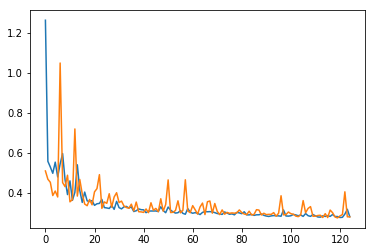

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [118]:
predict_pet = model_pet.predict(test_data)

In [119]:
predict_pet

array([[1.1133241e-09, 7.3102571e-02, 9.2689526e-01, 2.2613117e-06],
       [1.1203843e-02, 2.9212239e-01, 6.7530197e-01, 2.1371808e-02],
       [3.4546156e-06, 8.0029689e-02, 9.1978294e-01, 1.8383756e-04],
       ...,
       [8.5704982e-05, 8.8699885e-02, 9.1044748e-01, 7.6687941e-04],
       [2.5197574e-01, 2.6616471e-02, 1.7904818e-01, 5.4235953e-01],
       [5.9459114e-04, 2.1807690e-01, 7.7760112e-01, 3.7273895e-03]],
      dtype=float32)

In [120]:
pred_class_pet = []
for pred in predict_pet:
    lis = list(pred)
    pred_class_pet.append(lis.index(max(lis)))

In [121]:
pred_class_pet = pd.DataFrame(pred_class_pet, columns=['pet_category'])

In [122]:
pred_class_pet.pet_category.value_counts()

2    4941
1    2799
3     332
Name: pet_category, dtype: int64

In [123]:
def replace(cols):
    value = cols[0]
    if value == 3:
        return value + 1
    else:
        return value
    
pred_class_pet['pet_category'] = pred_class_pet[['pet_category']].apply(replace, axis=1)

In [124]:
temp_data = pd.read_csv('Dataset/test.csv')
final_csv = pd.concat([temp_data.pet_id, pred_class_breed, pred_class_pet], axis=1)
final_csv.to_csv('nnpreds.csv', index=False)

# Summary

Used boosting algorithm, that is LightGBM model to get the best predictiono in the competition which helped me secure a rank of 274 participated by more than 5000 candidates.

Learnings during the competition:
1. Donot neglect any feature without knowing its importance.
2. random_state parameter have influence on the model accuracy.
3. Working of LightGBM model.
4. Increasing n_estimators does not mean the model is better.